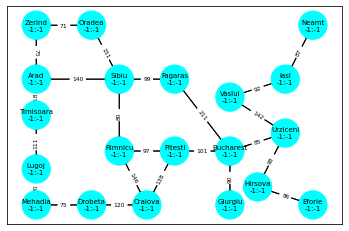

In [1]:
import random
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

from collections import deque

class Thing:
    def __init__(self, name=''):
        self.name = name
    def __repr__(self):
        return self.name

class Problem(Thing):
    def __init__(self, name):
        super().__init__(name)

class Node(Thing):
    def __init__(self, name, children=None, loc=None, state=-1, order=-1):
        super().__init__(name)
        self.children = children if children is not None else {}
        self.loc = loc
        self.state = state
        self.order = order
    def add_child(self, child_name, child_weight):
        self.children[child_name] = child_weight

class Graph(Thing):
    def __init__(self, name):
        super().__init__(name)
        self.node_list = []
        self.node_map = {}
    def add_node(self, node):
        self.node_list.append(node)  # 如果我们希望node实际有一个位置属性，这里可变
        self.node_map[node.name] = node
    def draw(self, font_size=10, k_layout=0.1):
        plt.rcdefaults()
        plt.rcParams['figure.dpi'] = 150
        g = nx.DiGraph()
        # g = nx.Graph()
        edges = []
        edges_map = {}
        for node in self.node_list:
            for key, val in node.children.items():
                edges.append((node.name, key, 1 / val))
                edges_map[(node.name, key)] = val
        g.add_weighted_edges_from(edges)
        # {'':(x,y)}
        pos_map = {}
        nodes_label = {}
        for node in self.node_list:
            if node.loc is not None:
                pos_map[node.name] = node.loc
            nodes_label[node.name] = node.name +"\n"+str(node.state)+":"+str(node.order)
        # print(pos_map)
        rand_seed = random.randint(1, 1000)
        if len(pos_map) > 0:
            locs = nx.spring_layout(g, pos=pos_map, fixed=pos_map.keys(), seed=rand_seed, k=k_layout)
        else:
            locs = nx.spring_layout(g, seed=rand_seed, k=k_layout)
        # print(locs)
        color_arr = []
        for node in self.node_list:
            color_arr.append(node.state)
        nx.draw_networkx_nodes(g, pos=locs,
                               node_size=800,
                               node_color=color_arr,
                               cmap=plt.cm.cool)  #[ 1,2,3,4]
        nx.draw_networkx_labels(g, pos=locs,
                                labels=nodes_label, # {'Arad':"Arad\ncost-n"}
                                font_size=font_size,
                                font_color='black')

        nx.draw_networkx_edges(g, pos=locs, )
        nx.draw_networkx_edge_labels(g, pos=locs,
                                     edge_labels=edges_map,
                                     font_size=font_size - 1)  # {(start, end):1}

class RomaniaProblemGraph(Graph, Problem):
    def __init__(self, name):
        super().__init__(name)
        romania_nodes = pd.read_csv("data/romania_nodes.csv")
        romania_edges = pd.read_csv("data/romania_edges.csv")
        for idx, (s, e, w) in romania_edges.iterrows():
            self.add_edge((s, e, w))
        for idx, (s, x, y) in romania_nodes.iterrows():
            if not np.isnan(x) or not np.isnan(y):
                self.node_map[s].loc = (x, y)
    def add_edge(self, edge):
        if edge[0] in self.node_map:
            node_0 = self.node_map[edge[0]]
        else:
            node_0 = Node(edge[0])
            self.add_node(node_0)
        if edge[1] in self.node_map:
            node_1 = self.node_map[edge[1]]
        else:
            node_1 = Node(edge[1])
            self.add_node(node_1)
        node_0.add_child(node_1.name, edge[2])
        node_1.add_child(node_0.name, edge[2])

problem = RomaniaProblemGraph('Bucharest')
problem.draw(font_size=7, k_layout=0.3)

In [2]:
bx, by = problem.node_map['Bucharest'].loc[0],problem.node_map['Bucharest'].loc[1]
for node in problem.node_list:
    disx,disy = node.loc[0]-bx, node.loc[1]-by
    node.hx = np.sqrt(disx*disx+disy*disy)
    print(node.name, node.hx)

Arad 8.06225774829855
Zerind 9.899494936611665
Sibiu 5.656854249492381
Timisoara 7.280109889280518
Oradea 8.602325267042627
Fagaras 4.47213595499958
Rimnicu 4.0
Lugoj 7.0710678118654755
Bucharest 0.0
Pitesti 2.0
Mehadia 7.615773105863909
Craiova 4.242640687119285
Drobeta 5.830951894845301
Urziceni 2.23606797749979
Giurgiu 3.0
Vaslui 3.0
Iasi 4.47213595499958
Neamt 7.615773105863909
Hirsova 2.23606797749979
Eforie 4.242640687119285


Arad 0
Arad-Sibiu 140
Arad-Sibiu-Fagaras 239
Arad-Sibiu-Fagaras-Bucharest 450
Arad-Sibiu-Fagaras-Bucharest-Pitesti 551
Arad-Sibiu-Fagaras-Bucharest-Urziceni 535
Arad-Sibiu-Fagaras-Bucharest-Urziceni-Hirsova 633
Arad-Sibiu-Fagaras-Bucharest-Urziceni-Vaslui 677
Arad-Sibiu-Fagaras-Bucharest-Giurgiu 540
Arad-Sibiu-Rimnicu 220
Arad-Sibiu-Fagaras-Bucharest-Urziceni-Hirsova-Eforie 719
Arad-Sibiu-Fagaras-Bucharest-Pitesti-Craiova 689
Arad-Sibiu-Fagaras-Bucharest-Urziceni-Vaslui-Iasi 769
Arad-Sibiu-Fagaras-Bucharest-Pitesti-Craiova-Drobeta 809
Arad-Timisoara 118
Arad-Timisoara-Lugoj 229
Arad-Sibiu-Fagaras-Bucharest-Pitesti-Craiova-Drobeta-Mehadia 884
Arad-Sibiu-Fagaras-Bucharest-Urziceni-Vaslui-Iasi-Neamt 856
Arad-Sibiu-Oradea 291
Arad-Zerind 75


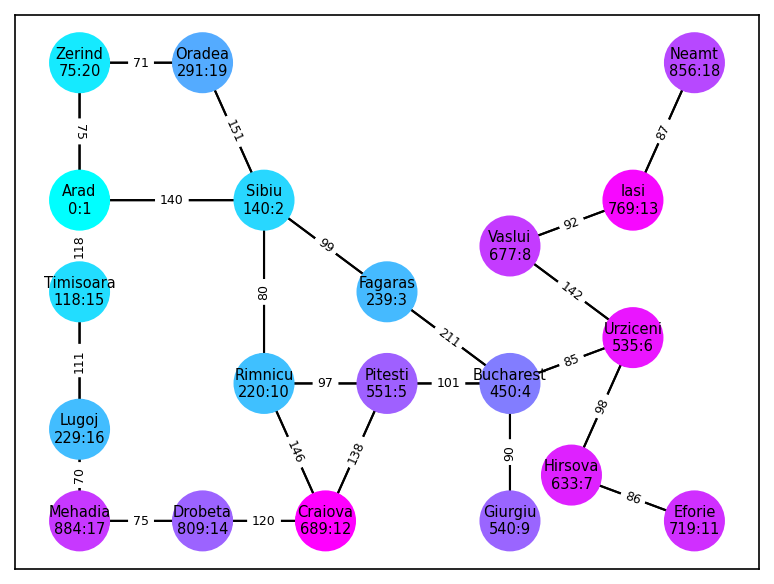

In [4]:
# 贪心
problem = RomaniaProblemGraph("Bucharest")
bx, by = problem.node_map['Bucharest'].loc[0],problem.node_map['Bucharest'].loc[1]
for node in problem.node_list:
    disx,disy = node.loc[0]-bx, node.loc[1]-by
    node.hx = np.sqrt(disx*disx+disy*disy)

unvisited_nodes = []
unvisited_nodes.append(problem.node_map['Arad'])

problem.node_map['Arad'].state=0
problem.node_map['Arad'].path="Arad"
order = 1
while len(unvisited_nodes)>0:
    unvisited_nodes.sort(key=lambda n: -n.hx)
    visiting_node = unvisited_nodes.pop()
    visiting_node.order = order
    order = order + 1
    for child_name, path_cost in visiting_node.children.items():
        child_node = problem.node_map[child_name]
        if child_node.state == -1:
            child_node.state = visiting_node.state + path_cost
            child_node.path = visiting_node.path + "-" + child_node.name
            unvisited_nodes.append(child_node)
    print(visiting_node.path, visiting_node.state)
problem.draw(font_size=7, k_layout=0.3)

700 Arad 0 700
540 Arad-Sibiu 140 400
620 Arad-Sibiu-Rimnicu 220 400
517 Arad-Sibiu-Rimnicu-Pitesti 317 200
418 Arad-Sibiu-Rimnicu-Pitesti-Bucharest 418 0
639 Arad-Sibiu-Fagaras 239 400
666 Arad-Sibiu-Rimnicu-Craiova 366 300
703 Arad-Sibiu-Rimnicu-Pitesti-Bucharest-Urziceni 503 200
775 Arad-Zerind 75 700
801 Arad-Sibiu-Rimnicu-Pitesti-Bucharest-Urziceni-Hirsova 601 200
808 Arad-Sibiu-Rimnicu-Pitesti-Bucharest-Giurgiu 508 300
818 Arad-Timisoara 118 700
929 Arad-Timisoara-Lugoj 229 700
945 Arad-Sibiu-Rimnicu-Pitesti-Bucharest-Urziceni-Vaslui 645 300
986 Arad-Sibiu-Rimnicu-Craiova-Drobeta 486 500
987 Arad-Sibiu-Rimnicu-Pitesti-Bucharest-Urziceni-Hirsova-Eforie 687 300
991 Arad-Sibiu-Oradea 291 700
999 Arad-Timisoara-Lugoj-Mehadia 299 700
1137 Arad-Sibiu-Rimnicu-Pitesti-Bucharest-Urziceni-Vaslui-Iasi 737 400
1524 Arad-Sibiu-Rimnicu-Pitesti-Bucharest-Urziceni-Vaslui-Iasi-Neamt 824 700


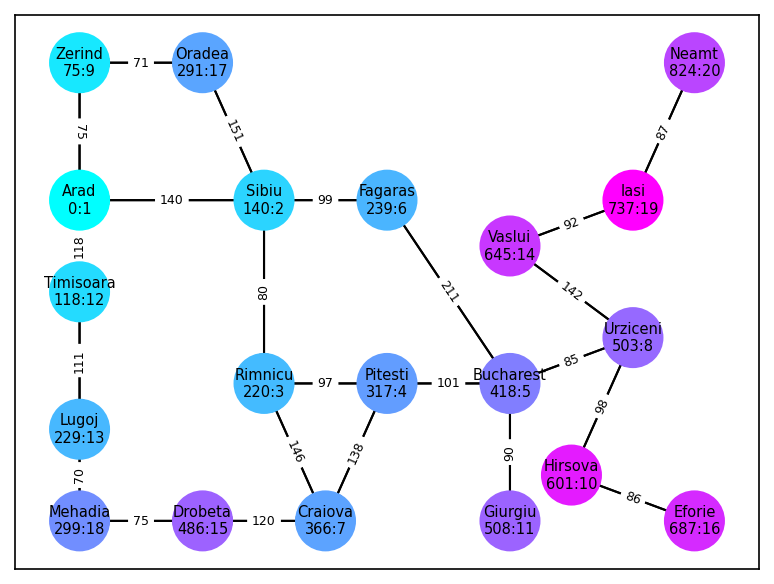

In [14]:
# A*
problem = RomaniaProblemGraph("Bucharest")
bx, by = problem.node_map['Bucharest'].loc[0],problem.node_map['Bucharest'].loc[1]
for node in problem.node_list:
    disx,disy = np.abs(node.loc[0]-bx), np.abs(node.loc[1]-by)
    # node.hx = np.sqrt(disx*disx+disy*disy)*100
    node.hx = (disx*disx+disy*disy)*10
    node.hx = (disx if disx > disy else disy)*100

unvisited_nodes = []
unvisited_nodes.append(problem.node_map['Arad'])

problem.node_map['Arad'].state=0
problem.node_map['Arad'].path="Arad"
order = 1
while len(unvisited_nodes)>0:
    unvisited_nodes.sort(key=lambda n: -(n.state+n.hx))
    visiting_node = unvisited_nodes.pop()
    visiting_node.order = order
    order = order + 1
    for child_name, path_cost in visiting_node.children.items():
        child_node = problem.node_map[child_name]
        if child_node.state == -1:
            child_node.state = visiting_node.state + path_cost
            child_node.path = visiting_node.path + "-" + child_node.name
            unvisited_nodes.append(child_node)
    print(str(visiting_node.state+visiting_node.hx)[:4], visiting_node.path, visiting_node.state, visiting_node.hx)
problem.draw(font_size=7, k_layout=0.3)